In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score





In [3]:
df = pd.read_csv("data/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [12]:
features = [
    'area',  'bedrooms', 'bathrooms', 'stories', 'parking',
    'mainroad', 'guestroom', 'basement', 'hotwaterheating',
    'airconditionong', 'prefarea', 'furnishingstatus'
]

In [35]:
features = [
    'price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus'
]

df = df[features + ['price']]

df_encoded = pd.get_dummies(df, drop_first = True)

X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.2, random_state =42) 


In [30]:
print(df.columns.tolist())

['price', 'price', 'price', 'price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus', 'price', 'price', 'price', 'price']


In [39]:
model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression()

In [41]:
y_pred = model.predict(X_test)

In [56]:
from sklearn.metrics import(
    mean_absolute_error,
    mean_squared_error,
    r2_score
)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):" , mae)
print("Mean squared Error (MSE):", mse)
print("R-squared (R^2):", r2)


Mean Absolute Error (MAE): 970043.4039201639
Mean squared Error (MSE): 1754318687330.6646
R-squared (R^2): 0.6529242642153184


In [89]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)


X_test shape: (109, 13)
y_test shape: (109, 32)
y_pred shape: (109, 32)


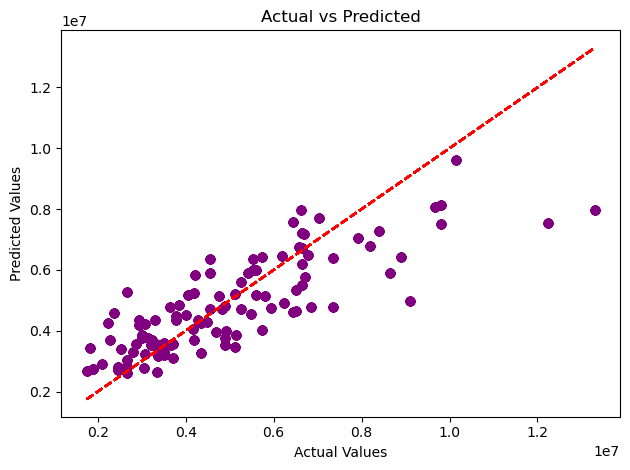

In [93]:
plt.scatter(y_test, y_pred, color='purple')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line y = x
plt.tight_layout()
plt.show()


In [96]:
print("Intercept (β₀):", model.intercept_)
print("Coefficients (β₁, β₂, ...):", model.coef_)


Intercept (β₀): [260032.35760741 260032.35760741 260032.35760741 260032.35760741
 260032.35760741 260032.35760741 260032.35760741 260032.35760741
 260032.35760741 260032.35760741 260032.35760741 260032.35760741
 260032.35760741 260032.35760741 260032.35760741 260032.35760741
 260032.35760741 260032.35760741 260032.35760741 260032.35760741
 260032.35760741 260032.35760741 260032.35760741 260032.35760741
 260032.35760741 260032.35760741 260032.35760741 260032.35760741
 260032.35760741 260032.35760741 260032.35760741 260032.35760741]
Coefficients (β₁, β₂, ...): [[ 2.35968805e+02  7.67787016e+04  1.09444479e+06  4.07476595e+05
   2.24841913e+05  3.67919948e+05  2.31610037e+05  3.90251176e+05
   6.84649885e+05  7.91426736e+05  6.29890565e+05 -1.26881818e+05
  -4.13645062e+05]
 [ 2.35968805e+02  7.67787016e+04  1.09444479e+06  4.07476595e+05
   2.24841913e+05  3.67919948e+05  2.31610037e+05  3.90251176e+05
   6.84649885e+05  7.91426736e+05  6.29890565e+05 -1.26881818e+05
  -4.13645062e+05]
 

In [98]:
if hasattr(X_test, 'columns'):
    for feature, coef in zip(X_test.columns, model.coef_):
        print(f"{feature}: {coef}")

area: [ 2.35968805e+02  7.67787016e+04  1.09444479e+06  4.07476595e+05
  2.24841913e+05  3.67919948e+05  2.31610037e+05  3.90251176e+05
  6.84649885e+05  7.91426736e+05  6.29890565e+05 -1.26881818e+05
 -4.13645062e+05]
bedrooms: [ 2.35968805e+02  7.67787016e+04  1.09444479e+06  4.07476595e+05
  2.24841913e+05  3.67919948e+05  2.31610037e+05  3.90251176e+05
  6.84649885e+05  7.91426736e+05  6.29890565e+05 -1.26881818e+05
 -4.13645062e+05]
bathrooms: [ 2.35968805e+02  7.67787016e+04  1.09444479e+06  4.07476595e+05
  2.24841913e+05  3.67919948e+05  2.31610037e+05  3.90251176e+05
  6.84649885e+05  7.91426736e+05  6.29890565e+05 -1.26881818e+05
 -4.13645062e+05]
stories: [ 2.35968805e+02  7.67787016e+04  1.09444479e+06  4.07476595e+05
  2.24841913e+05  3.67919948e+05  2.31610037e+05  3.90251176e+05
  6.84649885e+05  7.91426736e+05  6.29890565e+05 -1.26881818e+05
 -4.13645062e+05]
parking: [ 2.35968805e+02  7.67787016e+04  1.09444479e+06  4.07476595e+05
  2.24841913e+05  3.67919948e+05  2.31

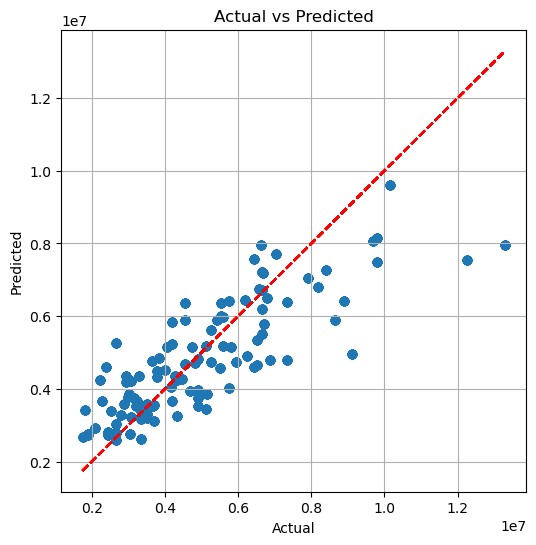

In [106]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()


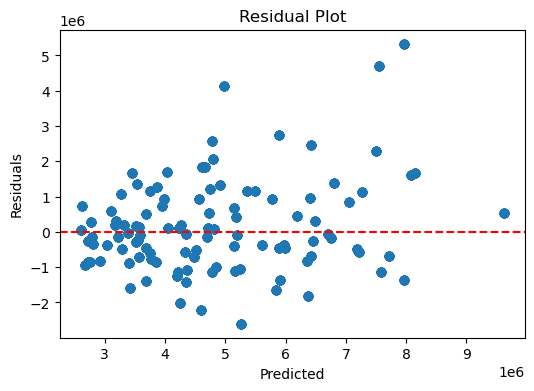

In [108]:
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()